In [80]:
import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn import datasets
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
from math import sqrt, log10
import os.path


In [2]:
phone_data = pd.read_csv("telefony.csv", sep=',') 

In [72]:
print(phone_data.shape)

(2000, 21)


In [3]:
X = phone_data.iloc[:, 0:20]

In [4]:
y = phone_data["price_range"]

In [5]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(y.to_numpy().reshape(-1,1))
Y = enc.transform(y.to_numpy().reshape(-1,1)).toarray()

In [6]:
X_train, X_vt, Y_train, Y_vt = train_test_split(X.to_numpy(), Y, test_size=0.3, random_state=1)

In [7]:
X_test, X_val, Y_test, Y_val = train_test_split(X_vt, Y_vt, test_size=0.5, random_state=1)

In [ ]:
number_of_neurons=201
number_of_layers=46
n_skip=5
l_skip=5
n_min = 5
l_min= 5

In [ ]:
for n in range(n_min,number_of_neurons,n_skip):
    for l in range(l_min,number_of_layers,l_skip):
        model = tf.keras.Sequential()
        name="saved/"+"n"+str(n)+"l"+str(l)+".hdf5"
        file_exists = os.path.exists(name)
        if not file_exists:
            for x in range(l):
                model.add(tf.keras.layers.Dense(n, activation='relu', input_shape=(20,),kernel_regularizer=regularizers.L2(0.01)))
            model.add(tf.keras.layers.Dense(4, activation='softmax'))

            model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

            checkpoint = ModelCheckpoint(name, monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto', period=1)
            history = model.fit(X_train, Y_train, epochs=100, validation_data=(X_val, Y_val),callbacks=[checkpoint])

In [8]:
best_n=0
best_l=0
best_acc=0
best_m=0
i=0
r = {'n':[],'l':[],'test_acc':[],'test_loss':[],'train_acc':[],'train_loss':[],'val_acc':[],'val_loss':[],'m':[],'m2':[]}
results = pd.DataFrame(r)

for n in range(1,500,1):
    for l in range(1,120,1):
        name="saved/"+"n"+str(n)+"l"+str(l)+".hdf5"
        file_exists = os.path.exists(name)
        if file_exists:
            model2 = load_model(name)
            eva_test = model2.evaluate(X_test, Y_test)
            test_acc=eva_test[1]
            test_loss=eva_test[0]

            eva_train = model2.evaluate(X_train, Y_train)
            train_acc=eva_train[1]
            train_loss=eva_train[0]

            eva_val = model2.evaluate(X_val, Y_val)
            val_acc=eva_val[1]
            val_loss=eva_val[0]

            m=((test_acc)**5*(train_acc)*(val_acc)**2)/(1+(test_loss)**5+(train_loss)+(val_loss)**2)
            m2=2*m/(log10(100+l*sqrt(n)))

            results.loc[i,:]=[n,l,test_acc,test_loss,train_acc,train_loss,val_acc,val_loss,m,m2]
            i+=1
            if m > best_m:
                best_m = m
                best_n = n
                best_l = l

44/44 [==============================] - 0s 627us/step - loss: 0.8471 - accuracy: 0.6057


10/10 [==============================] - 0s 665us/step - loss: 0.7452 - accuracy: 0.6867


10/10 [==============================] - 0s 776us/step - loss: 0.2525 - accuracy: 0.9267


44/44 [==============================] - 0s 949us/step - loss: 0.0754 - accuracy: 0.9779


10/10 [==============================] - 0s 772us/step - loss: 1.0560 - accuracy: 0.7267


10/10 [==============================] - 0s 780us/step - loss: 1.7548 - accuracy: 0.7133


44/44 [==============================] - 0s 649us/step - loss: 0.7433 - accuracy: 0.7529


10/10 [==============================] - 0s 1ms/step - loss: 0.1077 - accuracy: 0.9600


10/10 [==============================] - 0s 776us/step - loss: 0.1710 - accuracy: 0.9267


10/10 [==============================] - 0s 776us/step - loss: 1.3990 - accuracy: 0.7033


10/10 [==============================] - 0s 776us/step - loss: 0.8193 - accuracy: 0.6933


10/10 [==============================] - 0s 665us/step - loss: 1.8541 - accuracy: 0.6833


10/10 [==============================] - 0s 773us/step - loss: 1.4811 - accuracy: 0.7033


10/10 [==============================] - 0s 2ms/step - loss: 1.3880 - accuracy: 0.2133


44/44 [==============================] - 0s 2ms/step - loss: 1.3859 - accuracy: 0.2607


44/44 [==============================] - 0s 1ms/step - loss: 0.1190 - accuracy: 0.9636


44/44 [==============================] - 0s 1ms/step - loss: 0.0960 - accuracy: 0.9807


44/44 [==============================] - 0s 729us/step - loss: 0.4289 - accuracy: 0.8029


44/44 [==============================] - 0s 650us/step - loss: 1.0414 - accuracy: 0.7736


44/44 [==============================] - 0s 618us/step - loss: 0.8433 - accuracy: 0.7914


44/44 [==============================] - 0s 648us/step - loss: 0.4434 - accuracy: 0.8043


44/44 [==============================] - 0s 3ms/step - loss: 1.3860 - accuracy: 0.2607


44/44 [==============================] - 0s 3ms/step - loss: 1.3861 - accuracy: 0.2607


44/44 [==============================] - 0s 2ms/step - loss: 1.3860 - accuracy: 0.2514


44/44 [==============================] - 0s 2ms/step - loss: 0.1327 - accuracy: 0.9571


44/44 [==============================] - 0s 1ms/step - loss: 0.0949 - accuracy: 0.9771


44/44 [==============================] - 0s 652us/step - loss: 0.9977 - accuracy: 0.7707


44/44 [==============================] - 0s 640us/step - loss: 1.3941 - accuracy: 0.7721


10/10 [==============================] - 0s 995us/step - loss: 0.5518 - accuracy: 0.7833


10/10 [==============================] - 0s 3ms/step - loss: 0.1311 - accuracy: 0.9600


10/10 [==============================] - 0s 776us/step - loss: 2.6063 - accuracy: 0.7033


44/44 [==============================] - 0s 835us/step - loss: 0.4406 - accuracy: 0.7993


44/44 [==============================] - 0s 2ms/step - loss: 0.1219 - accuracy: 0.9636


44/44 [==============================] - 0s 680us/step - loss: 0.6778 - accuracy: 0.7843


10/10 [==============================] - 0s 997us/step - loss: 0.6394 - accuracy: 0.7200


10/10 [==============================] - 0s 886us/step - loss: 0.6965 - accuracy: 0.7167


10/10 [==============================] - 0s 3ms/step - loss: 0.1403 - accuracy: 0.9467


44/44 [==============================] - 0s 928us/step - loss: 0.8908 - accuracy: 0.7721


10/10 [==============================] - 0s 2ms/step - loss: 0.1652 - accuracy: 0.9400


10/10 [==============================] - 0s 887us/step - loss: 2.4903 - accuracy: 0.6833


10/10 [==============================] - 0s 870us/step - loss: 1.3592 - accuracy: 0.7033


44/44 [==============================] - 0s 680us/step - loss: 0.5576 - accuracy: 0.8043


10/10 [==============================] - 0s 779us/step - loss: 1.9222 - accuracy: 0.7133


10/10 [==============================] - 0s 3ms/step - loss: 1.3812 - accuracy: 0.3367


44/44 [==============================] - 0s 715us/step - loss: 1.5283 - accuracy: 0.7314


10/10 [==============================] - 0s 776us/step - loss: 2.1877 - accuracy: 0.7233


10/10 [==============================] - 0s 778us/step - loss: 2.2486 - accuracy: 0.7100


44/44 [==============================] - 0s 750us/step - loss: 0.6297 - accuracy: 0.7914


10/10 [==============================] - 0s 1ms/step - loss: 0.5552 - accuracy: 0.7400


10/10 [==============================] - 0s 1ms/step - loss: 0.5673 - accuracy: 0.7667


44/44 [==============================] - 0s 643us/step - loss: 1.4185 - accuracy: 0.7893


10/10 [==============================] - 0s 776us/step - loss: 0.8115 - accuracy: 0.7100


10/10 [==============================] - 0s 889us/step - loss: 1.2123 - accuracy: 0.7033


44/44 [==============================] - 0s 817us/step - loss: 0.4510 - accuracy: 0.8029


10/10 [==============================] - 0s 997us/step - loss: 2.7301 - accuracy: 0.6967


10/10 [==============================] - 0s 779us/step - loss: 3.0391 - accuracy: 0.7200


44/44 [==============================] - 0s 802us/step - loss: 0.5800 - accuracy: 0.7943


10/10 [==============================] - 0s 1ms/step - loss: 0.5271 - accuracy: 0.7800


10/10 [==============================] - 0s 1ms/step - loss: 0.5499 - accuracy: 0.7833


In [21]:
name="saved/"+"n"+str(best_n)+"l"+str(best_l)+".hdf5"

In [22]:
model3 = load_model(name)

In [23]:
model3.evaluate(X_test, Y_test)

10/10 [==============================] - 0s 1ms/step - loss: 0.1052 - accuracy: 0.9733


[0.1052248626947403, 0.9733333587646484]

In [24]:
model3.evaluate(X_train, Y_train)

44/44 [==============================] - 0s 1ms/step - loss: 0.0737 - accuracy: 0.9800


[0.07373853772878647, 0.9800000190734863]

In [9]:
results

,n,l,test_acc,test_loss,train_acc,train_loss,val_acc,val_loss,m,m2
0,1.0,1.0,0.423333,8.443958,0.478571,13.481434,0.420000,20.600658,2.646731e-08,2.641025e-08
1,1.0,2.0,0.236667,1.386689,0.260714,1.386142,0.213333,1.386704,9.335951e-07,9.295978e-07
2,1.0,3.0,0.236667,1.386937,0.260714,1.386126,0.213333,1.386545,9.331869e-07,9.272353e-07
3,2.0,1.0,0.546667,0.987604,0.550000,0.959969,0.530000,1.039345,1.895274e-03,1.889512e-03
4,2.0,2.0,0.233333,1.386825,0.255000,1.412129,0.260000,1.386507,1.259727e-06,1.252144e-06
...,...,...,...,...,...,...,...,...,...,...
1812,399.0,2.0,0.736667,0.934020,0.801429,0.544141,0.720000,0.988020,2.789486e-02,2.599741e-02
1813,399.0,3.0,0.760000,0.556870,0.809286,0.434896,0.760000,0.554741,6.598511e-02,5.987987e-02
1814,400.0,1.0,0.703333,2.645025,0.787143,1.596005,0.713333,2.474320,4.988759e-04,4.798772e-04
1815,400.0,2.0,0.693333,0.795216,0.812143,0.451518,0.730000,0.775040,2.925520e-02,2.726324e-02


In [20]:
best_l

35

In [ ]:
results = results.drop(results[results.test_acc < 0.85].index)
results = results.drop(results[results.train_acc < 0.85].index)
results = results.drop(results[results.train_loss > 0.2].index)
results = results.drop(results[results.test_loss > 0.2].index)

In [ ]:
results = results.drop(results[results.m2 < 0.55].index)

C:\Users\konra\AppData\Local\Temp/ipykernel_17244/2145775556.py:1: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  threedee = plt.figure().gca(projection='3d')


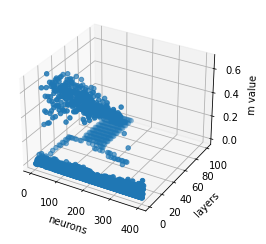

In [10]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(results['n'], results['l'], results['m2'])
threedee.set_xlabel('neurons')
threedee.set_ylabel('layers')
threedee.set_zlabel('m value')
plt.show()

In [ ]:
results = results.drop(results[results.m < 1.42].index)

In [30]:
results

,n,l,test_acc,test_loss,train_acc,train_loss,val_acc,val_loss,m,m2
0,1.0,1.0,0.423333,8.443958,0.478571,13.481434,0.420000,20.600658,2.646731e-08,2.641025e-08
1,1.0,2.0,0.236667,1.386689,0.260714,1.386142,0.213333,1.386704,9.335951e-07,9.295978e-07
2,1.0,3.0,0.236667,1.386937,0.260714,1.386126,0.213333,1.386545,9.331869e-07,9.272353e-07
3,2.0,1.0,0.546667,0.987604,0.550000,0.959969,0.530000,1.039345,1.895274e-03,1.889512e-03
4,2.0,2.0,0.233333,1.386825,0.255000,1.412129,0.260000,1.386507,1.259727e-06,1.252144e-06
...,...,...,...,...,...,...,...,...,...,...
1812,399.0,2.0,0.736667,0.934020,0.801429,0.544141,0.720000,0.988020,2.789486e-02,2.599741e-02
1813,399.0,3.0,0.760000,0.556870,0.809286,0.434896,0.760000,0.554741,6.598511e-02,5.987987e-02
1814,400.0,1.0,0.703333,2.645025,0.787143,1.596005,0.713333,2.474320,4.988759e-04,4.798772e-04
1815,400.0,2.0,0.693333,0.795216,0.812143,0.451518,0.730000,0.775040,2.925520e-02,2.726324e-02


In [25]:
model3.save('najlepszymodel/n50l35.hdf5')

In [ ]:
model4 = load_model('najlepszymodel/n50l35.hdf5')

In [ ]:
model4.evaluate(X_test, Y_test)

In [42]:
# Najlepsze wyniki sieci, gdzie liczba warstw <=3
results2 = results.drop(results[results.l > 3].index)
results2 = results2.drop(results2[results2.test_acc < 0.78].index)
results2 = results2.drop(results2[results2.val_acc < 0.78].index)

results2

,n,l,test_acc,test_loss,train_acc,train_loss,val_acc,val_loss,m,m2
1486,290.0,3.0,0.793333,0.513576,0.825000,0.417458,0.786667,0.533000,0.092352,0.084756
1648,344.0,3.0,0.813333,0.462790,0.847857,0.372865,0.790000,0.523103,0.112926,0.103029
1651,345.0,3.0,0.790000,0.506074,0.819286,0.433218,0.793333,0.549060,0.089749,0.081875
1699,361.0,3.0,0.816667,0.468603,0.833571,0.418062,0.790000,0.505581,0.111411,0.101471
1792,392.0,3.0,0.810000,0.458584,0.847857,0.376342,0.803333,0.497513,0.116038,0.105370
1801,395.0,3.0,0.800000,0.457460,0.839286,0.407983,0.800000,0.510163,0.104254,0.094644
1804,396.0,3.0,0.836667,0.446418,0.860714,0.396573,0.816667,0.464190,0.144405,0.131081
1807,397.0,3.0,0.783333,0.501711,0.834286,0.410104,0.800000,0.504772,0.092817,0.084244
1816,400.0,3.0,0.806667,0.487125,0.834286,0.412757,0.783333,0.549888,0.100344,0.091051


In [71]:
results2 = results.drop(results[results.m < 0.7].index)
results2

,n,l,test_acc,test_loss,train_acc,train_loss,val_acc,val_loss,m,m2
18,5.0,20.0,0.970000,0.097284,0.975714,0.090405,0.973333,0.101356,0.721176,0.667591
72,15.0,40.0,0.963333,0.101815,0.980714,0.071600,0.966667,0.095670,0.703474,0.584669
96,20.0,35.0,0.970000,0.106204,0.977143,0.087901,0.966667,0.109595,0.712864,0.591802
98,20.0,45.0,0.970000,0.097734,0.980714,0.078775,0.960000,0.117523,0.710369,0.573128
118,25.0,20.0,0.966667,0.105432,0.979286,0.073318,0.960000,0.111240,0.701655,0.609862
119,25.0,25.0,0.970000,0.108054,0.977857,0.082072,0.966667,0.099840,0.718527,0.610945
246,50.0,35.0,0.973333,0.105225,0.980000,0.073739,0.970000,0.091703,0.744365,0.585897
419,75.0,25.0,0.966667,0.102670,0.983571,0.082456,0.970000,0.110941,0.713523,0.570731
523,90.0,20.0,0.973333,0.121207,0.980714,0.096038,0.960000,0.138885,0.707914,0.575071
627,105.0,15.0,0.970000,0.105618,0.984286,0.077438,0.956667,0.115010,0.709258,0.589985
